In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA

# generate dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=5)
print("X dimensions:",X.shape)

X dimensions: (100, 20)


In [3]:
pca = PCA(n_components=5)
pca.fit(X)

print("Variance:",pca.explained_variance_ratio_)
print("Sing. values:",pca.singular_values_)

Variance: [0.26294809 0.14292477 0.07887189 0.06352685 0.05212772]
Sing. values: [28.17708848 20.77374752 15.43200078 13.84968053 12.54571673]


In [4]:
pca_full = PCA()
pca_full.fit(X)

PCA()

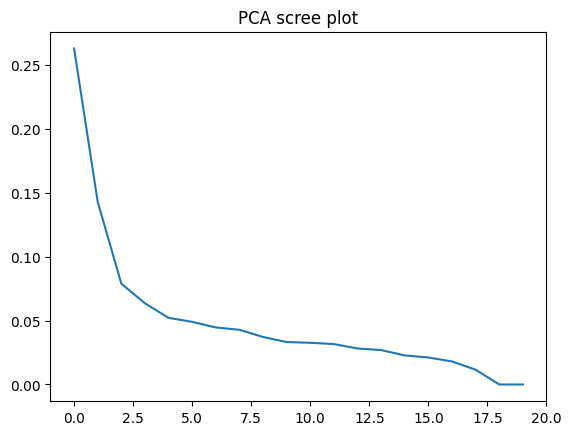

In [5]:
plt.figure()
plt.title('PCA scree plot')
plt.plot(pca_full.explained_variance_ratio_)
plt.xlim([-1,20])
plt.show()

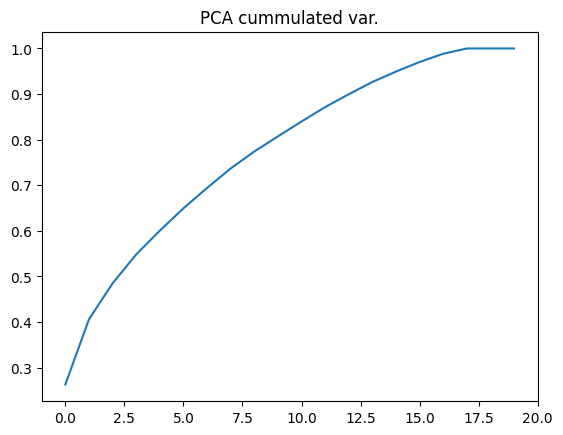

In [6]:
plt.figure()
plt.title('PCA cummulated var.')
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlim([-1,20])
plt.show()

In [7]:
X_pca = pca.fit_transform(X)
print("PCA X dimensions:",X_pca.shape)

PCA X dimensions: (100, 5)


### Univariate feature selection

f_classif: Compute the ANOVA F-value for the provided sample.

In [120]:
# define feature selection
fs = SelectKBest(score_func=f_classif, k=4)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 4)


In [10]:
fs.scores_

array([2.27656635e-02, 7.98902057e-01, 2.21540479e-01, 3.61905458e-01,
       2.21600365e-04, 1.34930503e+01, 2.51473794e+01, 1.58519770e+01,
       6.67346830e-01, 5.76986345e-03, 2.49102007e-01, 3.73955328e-01,
       1.34604746e-01, 1.14890594e+00, 7.73047732e-03, 1.07805205e-01,
       3.37229322e+01, 1.73693656e-01, 1.54226177e+00, 5.29908003e-01])

In [121]:
imp_ind = np.argsort(-fs.scores_) #descending order
imp_ind 

array([ 4, 18, 10,  8, 17,  9,  3, 19, 14, 11,  2,  5,  6,  1,  7, 15, 13,
        0, 16, 12], dtype=int64)

In [122]:
print('Important 4 features:',imp_ind[:4])

Important 4 features: [ 4 18 10  8]


In [ ]:
# index the features of the original dataset
X[:,np.sort(imp_ind[:4])] 

In [44]:
# verify the datasets are the same
np.all(np.isclose(X_selected, X[:,np.sort(imp_ind[:4])] ))

True

### Recursive Feature Elimination

#### feature selection w/ log reg

C:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Feature: 0, Score: 0.27905
Feature: 1, Score: 0.01216
Feature: 2, Score: -0.07978
Feature: 3, Score: -0.17353
Feature: 4, Score: 1.22052
Feature: 5, Score: 0.37576
Feature: 6, Score: -0.48155
Feature: 7, Score: -0.45910
Feature: 8, Score: 1.01279
Feature: 9, Score: -0.57443
Feature: 10, Score: -0.69601
Feature: 11, Score: -0.12912
Feature: 12, Score: -0.19899
Feature: 13, Score: 0.14390
Feature: 14, Score: -0.12818
Feature: 15, Score: 0.27241
Feature: 16, Score: 0.04501
Feature: 17, Score: -0.48365
Feature: 18, Score: -0.79397
Feature: 19, Score: -0.13087


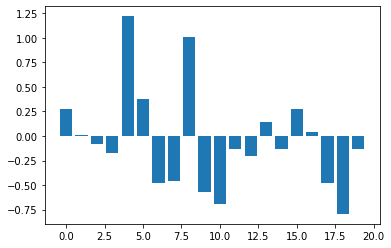

In [123]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [124]:
ind_impr = np.argsort(-np.abs(importance))
print('Feature importance:',ind_impr)

Feature importance: [ 4  8 18 10  9 17  6  7  5  0 15 12  3 13 19 11 14  2 16  1]


C:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Feature: 0, Score: 0.04991
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00701
Feature: 4, Score: 1.38559
Feature: 5, Score: 0.22121
Feature: 6, Score: -0.28760
Feature: 7, Score: -0.27365
Feature: 8, Score: 0.86695
Feature: 9, Score: -0.36883
Feature: 10, Score: -0.92235
Feature: 11, Score: 0.00000
Feature: 12, Score: -0.01570
Feature: 13, Score: 0.06471
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.04799
Feature: 16, Score: 0.00000
Feature: 17, Score: -0.21342
Feature: 18, Score: -0.51941
Feature: 19, Score: 0.00000


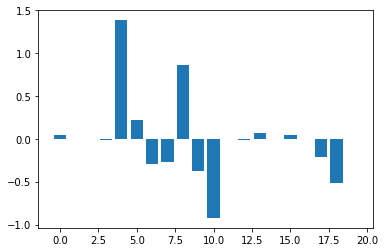

In [125]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression(penalty = 'l1')
# fit the model
model.fit(X, y)
# get importance
importance_l1 = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance_l1):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_l1))], importance_l1)
pyplot.show()

In [126]:
ind_impr_l1 = np.argsort(-np.abs(importance_l1))
print('Feature importance:',ind_impr_l1)

Feature importance: [ 4 10  8 18  9  6  7  5 17 13  0 15 12  3 11  2 14 16  1 19]


#### SVM feature importance

In [127]:
from sklearn.svm import LinearSVC
clf = LinearSVC( tol=1e-5, C = 0.1)
clf.fit(X, y)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=1e-05,
          verbose=0)

In [128]:
clf.coef_

array([[ 0.08034215,  0.00344689, -0.03650252, -0.06137983,  0.40997214,
         0.12774665, -0.18531087, -0.16598365,  0.34769612, -0.20546514,
        -0.24093284, -0.04842514, -0.07102495,  0.0403284 , -0.0628868 ,
         0.10618821,  0.0164245 , -0.17283242, -0.25992712, -0.0491761 ]])

In [129]:
SVM_impr = np.argsort(-np.abs(clf.coef_))[0]
print('Feature importance:',SVM_impr)

Feature importance: [ 4  8 18 10  9  6 17  7  5 15  0 12 14  3 19 11 13  2 16  1]


In [130]:
from sklearn.svm import LinearSVC
clf_l1 = LinearSVC(penalty="l1", loss="squared_hinge", dual=False, tol=1e-3)
clf_l1.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)

In [131]:
clf_l1.coef_

array([[ 0.08734099,  0.        , -0.04008158, -0.07526157,  0.53253865,
         0.15149036, -0.21366983, -0.20827364,  0.36686905, -0.24428951,
        -0.36477568, -0.03163592, -0.09397408,  0.03228789, -0.0897227 ,
         0.12568996,  0.00263194, -0.12742934, -0.17581053,  0.        ]])

In [132]:
SVM_impr_l1 = np.argsort(-np.abs(clf_l1.coef_))[0]
print('Feature importance:',SVM_impr_l1)

Feature importance: [ 4  8 10  9  6  7 18  5 17 15 12 14  0  3  2 13 11 16  1 19]


In [133]:
sft = np.sort(-np.abs(clf_l1.coef_))
sft

array([[-0.53253865, -0.36686905, -0.36477568, -0.24428951, -0.21366983,
        -0.20827364, -0.17581053, -0.15149036, -0.12742934, -0.12568996,
        -0.09397408, -0.0897227 , -0.08734099, -0.07526157, -0.04008158,
        -0.03228789, -0.03163592, -0.00263194, -0.        , -0.        ]])

In [134]:
d_rank = {'log_reg': ind_impr, 'l1': ind_impr_l1,'SVM':SVM_impr,'SVM_l1':SVM_impr_l1}
rank_df = pd.DataFrame(data=d_rank)
rank_df

,log_reg,l1,SVM,SVM_l1
0,4,4,4,4
1,8,10,8,8
2,18,8,18,10
3,10,18,10,9
4,9,9,9,6
5,17,6,6,7
6,6,7,17,18
7,7,5,7,5
8,5,17,5,17
9,0,13,15,15


### RFE

In [135]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
# model = LogisticRegression(solver='lbfgs')
model = LinearSVC(penalty="l1", loss="squared_hinge", dual=False, tol=1e-3)

rfe = RFE(model,n_features_to_select = 5)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [False False False False  True False False  True  True  True  True False
 False False False False False False False False]
Feature Ranking: [10 15 11  8  1  3  2  1  1  1  1 13  7 12  9  6 14  5  4 16]
